In [1]:
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
import torch
from ultralytics import YOLO
from PIL import Image
device = 'cpu'
device = 'gpu' if torch.cuda.is_available() else 'cpu'
model_path='weights/icon_detect/best.pt'
model_path='weights/icon_detect_v1_5/model_v1_5.pt'

som_model = get_yolo_model(model_path)

som_model.to(device)
print('model to {}'.format(device))

model to cpu


In [2]:
# two choices for caption model: fine-tuned blip2 or florence2
import importlib
import utils
importlib.reload(utils)
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model
# caption_model_processor = get_caption_model_processor(model_name="blip2", model_name_or_path="weights/icon_caption_blip2", device=device)
caption_model_processor = get_caption_model_processor(model_name="florence2", model_name_or_path="weights/icon_caption_florence", device=device)



Florence2LanguageForConditionalGeneration has generative capabilities, as `prepare_inputs_for_generation` is explicitly overwritten. However, it doesn't directly inherit from `GenerationMixin`. From 👉v4.50👈 onwards, `PreTrainedModel` will NOT inherit from `GenerationMixin`, and this model will lose the ability to call `generate` and other related functions.
  - If you're using `trust_remote_code=True`, you can get rid of this warning by loading the model with an auto class. See https://huggingface.co/docs/transformers/en/model_doc/auto#auto-classes
  - If you are the owner of the model architecture code, please modify your model class such that it inherits from `GenerationMixin` (after `PreTrainedModel`, otherwise you'll get an exception).
  - If you are not the owner of the model architecture class, please contact the model code owner to update it.


In [3]:
som_model.device, type(som_model) 

(device(type='cuda', index=0), ultralytics.models.yolo.model.YOLO)

In [ ]:
# reload utils
import importlib
import utils
importlib.reload(utils)
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model

image_path = 'imgs/google_page.png'
image_path = 'imgs/windows_home.png'
# image_path = 'imgs/windows_multitab.png'
# image_path = 'imgs/omni3.jpg'
# image_path = 'imgs/ios.png'
image_path = 'imgs/word.png'
# image_path = 'imgs/excel2.png'
# image_path = 'imgs/mobile.png'

image = Image.open(image_path)
image_rgb = image.convert('RGB')
print('image size:', image.size)

box_overlay_ratio = max(image.size) / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}
BOX_TRESHOLD = 0.05

import time
start = time.time()
ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.5}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt
cur_time_ocr = time.time() 

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=True, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.7, scale_img=False, batch_size=128)
cur_time_caption = time.time()
print('ocr time:', cur_time_ocr - start)
print('caption time:', cur_time_caption - cur_time_ocr)


image size: (1919, 1079)

image 1/1 /home/yadonglu/OmniParser/imgs/word.png: 736x1280 115 icons, 13.7ms
Speed: 5.5ms preprocess, 13.7ms inference, 1.6ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 151 65
time to prepare bbox: 0.01561737060546875
time to process image + tokenize text inputs: 0.09026336669921875
time to generate: 0.7382848262786865
time to get parsed content: 0.8477945327758789
ocr time: 0.6952385902404785
caption time: 1.245499849319458


In [3]:
# run on cpu!!!
# reload utils
import importlib
import utils
importlib.reload(utils)
from utils import get_som_labeled_img, check_ocr_box, get_caption_model_processor, get_yolo_model

image_path = 'imgs/google_page.png'
image_path = 'imgs/windows_home.png'
# image_path = 'imgs/windows_multitab.png'
# image_path = 'imgs/omni3.jpg'
# image_path = 'imgs/ios.png'
image_path = 'imgs/word.png'
# image_path = 'imgs/excel2.png'
# image_path = 'imgs/mobile.png'

image = Image.open(image_path)
image_rgb = image.convert('RGB')
print('image size:', image.size)

box_overlay_ratio = max(image.size) / 3200
draw_bbox_config = {
    'text_scale': 0.8 * box_overlay_ratio,
    'text_thickness': max(int(2 * box_overlay_ratio), 1),
    'text_padding': max(int(3 * box_overlay_ratio), 1),
    'thickness': max(int(3 * box_overlay_ratio), 1),
}
BOX_TRESHOLD = 0.05

import time
start = time.time()
ocr_bbox_rslt, is_goal_filtered = check_ocr_box(image_path, display_img = False, output_bb_format='xyxy', goal_filtering=None, easyocr_args={'paragraph': False, 'text_threshold':0.5}, use_paddleocr=True)
text, ocr_bbox = ocr_bbox_rslt
cur_time_ocr = time.time() 

dino_labled_img, label_coordinates, parsed_content_list = get_som_labeled_img(image_path, som_model, BOX_TRESHOLD = BOX_TRESHOLD, output_coord_in_ratio=True, ocr_bbox=ocr_bbox,draw_bbox_config=draw_bbox_config, caption_model_processor=caption_model_processor, ocr_text=text,use_local_semantics=True, iou_threshold=0.7, scale_img=False, batch_size=128)
cur_time_caption = time.time()
print('ocr time:', cur_time_ocr - start)
print('caption time:', cur_time_caption - cur_time_ocr)


image size: (1919, 1079)

image 1/1 /home/yadonglu/OmniParser/imgs/word.png: 736x1280 115 icons, 299.2ms
Speed: 5.7ms preprocess, 299.2ms inference, 3.7ms postprocess per image at shape (1, 3, 736, 1280)
len(filtered_boxes): 151 65
time to prepare bbox: 0.016057729721069336
time to process image + tokenize text inputs: 1.802201509475708
time to generate: 61.352588415145874
time to get parsed content: 63.17377543449402
ocr time: 0.8477699756622314
caption time: 64.17442154884338


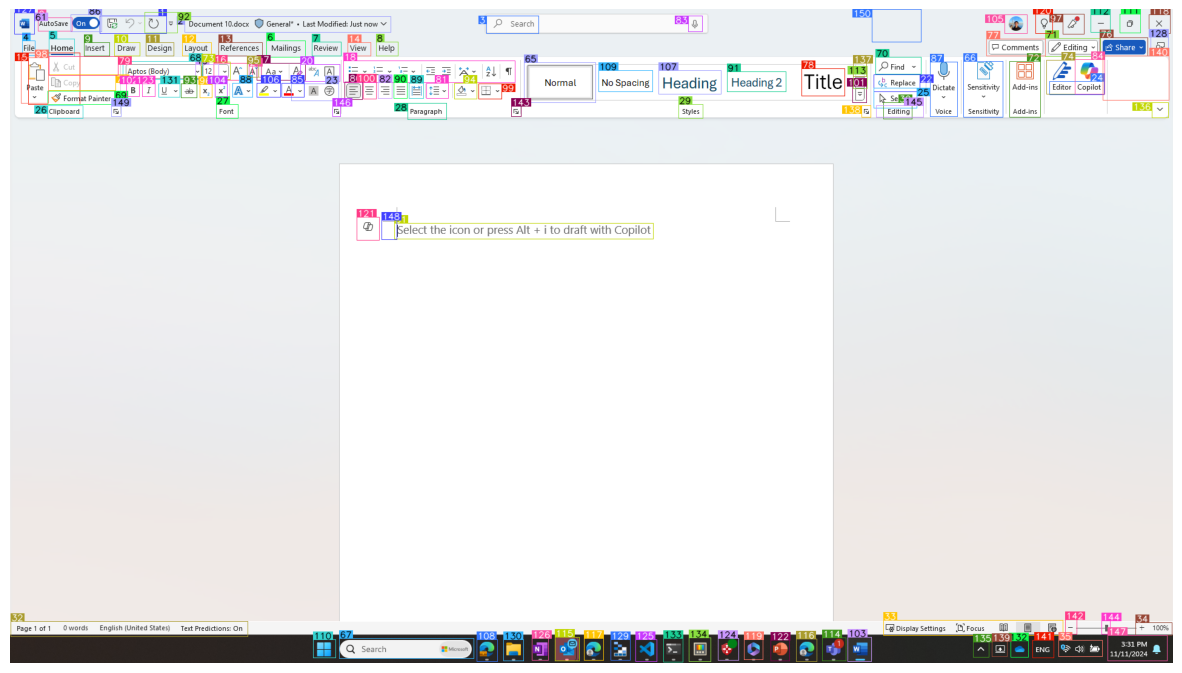

In [37]:
# plot dino_labled_img it is in base64
import base64
import matplotlib.pyplot as plt
import io
plt.figure(figsize=(15,15))

image = Image.open(io.BytesIO(base64.b64decode(dino_labled_img)))
plt.axis('off')

plt.imshow(image)
# print(len(parsed_content_list))


In [16]:
import pandas as pd
df = pd.DataFrame(parsed_content_list)
df['ID'] = range(len(df))

df

,type,bbox,interactivity,content,ID
0,text,"[0.023970818147063255, 0.012974976561963558, 0...",False,AutoSave,0
1,text,"[0.0771235004067421, 0.011121409013867378, 0.1...",False,F 9~U,1
2,text,"[0.1500781625509262, 0.011121409013867378, 0.3...",False,Document 10.docx General* Last Modified: Jus...,2
3,text,"[0.4095883369445801, 0.011121409013867378, 0.4...",False,O Search,3
4,text,"[0.010943199507892132, 0.048192769289016724, 0...",False,File,4
...,...,...,...,...,...
146,icon,"[0.27768608927726746, 0.1485075205564499, 0.28...",True,Six,146
147,icon,"[0.9438582062721252, 0.9580937027931213, 0.995...",True,battery charge indicator,147
148,icon,"[0.31950756907463074, 0.3229200839996338, 0.33...",True,A menu or list of options.,148
149,icon,"[0.08737719058990479, 0.148496612906456, 0.095...",True,"5,5L9,5 4.5z",149


In [8]:
parsed_content_list[-1]

{'type': 'icon',
 'bbox': [0.7569739818572998,
  0.128729909658432,
  0.7768653035163879,
  0.14445137977600098],
 'interactivity': True,
 'content': 'Select option.'}